In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


###### so we have to deal with nan value of age , fare, cabin columns


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


###### 
- about 36% pessenger survived 
- mean age of pessenger was 30 
- avg price ticket was 35 usd
- Half of the passengers travelled with siblings or spouse

##### Removing unuseful columns 
- It's obvious that PassengerID has nothing to do with our model so simply just dropped it!

In [5]:
df['Cabin'].value_counts()

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

###### 
- it looks like that cabin number is to spreaded to be used in the model but let's visualise it and then make the decision.
- At most 4 rows share the same cabin so it doens't help much and it's better to drop it.

In [6]:
df['Fare'].value_counts()

7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: Fare, Length: 169, dtype: int64

In [7]:
df['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [8]:
sns.set_style("darkgrid")

<AxesSubplot:xlabel='Fare', ylabel='Density'>

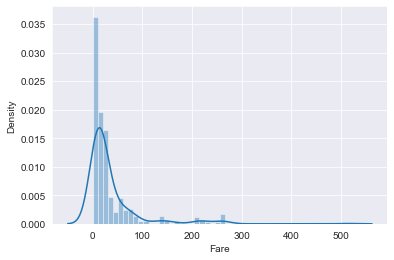

In [9]:
sns.distplot(df['Fare'])

- "Fare" Distplot is pretty much skewed, maybe it's better to use the log form.
- And clearly we don't have to remove "Fare" column.

In [10]:
df['Ticket'].value_counts()

PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: Ticket, Length: 363, dtype: int64

- Ticket column is like Cabin, so spreaded so we just remove it!
- First we check for duplicate names and then remove the Name column

In [11]:
df["Name"].duplicated().sum()

0

- No duplicates!
- But wait, maybe we can do a feature engineering and extract titles and form a new columns based on them!

##### Feature Engineering  alert 

In [12]:
# Apply function to make the new column

df['Title']=df['Name'].apply(lambda p : p.split()[1])

In [13]:
df['Title'].value_counts()

Mr.             234
Miss.            77
Mrs.             70
Master.          19
y                 4
Col.              2
Rev.              2
Billiard,         2
Carlo,            1
Khalil,           1
Ms.               1
Palmquist,        1
Planke,           1
Messemaeker,      1
Dr.               1
Brito,            1
Name: Title, dtype: int64

In [14]:
accetable_titles = ["Mr.", "Miss.", "Mrs.", "Master."]
def change_title(tit):
    for tit in accetable_titles:
        return tit
    else:
        return 'Pal'

In [15]:
df['Title']=df['Title'].apply(lambda p : change_title(p))

In [16]:
df.drop(["Cabin","Ticket","PassengerId","Name"],axis = 1, inplace=True)

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,34.5,0,0,7.8292,Q,Mr.
1,1,3,female,47.0,1,0,7.0000,S,Mr.
2,0,2,male,62.0,0,0,9.6875,Q,Mr.
3,0,3,male,27.0,0,0,8.6625,S,Mr.
4,1,3,female,22.0,1,1,12.2875,S,Mr.


#### Looking for missing data

In [18]:
def missing_percent(df):
    nan_percent=100*(df.isnull().sum()/len(df))
    nan_percent=nan_percent[nan_percent>0].sort_values()
    return nan_percent

In [19]:
missing_percent(df)

Fare     0.239234
Age     20.574163
dtype: float64

- 1 lets deal with age 

In [20]:
df["Age"].isnull().sum()

86

In [21]:
import math
female_mean, male_mean = df.groupby("Sex")["Age"].mean()
def fill_age(age,sex):
    if math.isnan(age):
        if sex == "male":
            return male_mean
        else:
            return female_mean
    else:
        return age

In [22]:
df["Age"] = df.apply(lambda row : fill_age(row["Age"],row["Sex"]),axis = 1)

In [23]:
df["Age"].isnull().sum()

0

In [24]:
df['Fare'].isnull().sum()

1

In [25]:
df=df.dropna()

In [26]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,34.5,0,0,7.8292,Q,Mr.
1,1,3,female,47.0,1,0,7.0000,S,Mr.
2,0,2,male,62.0,0,0,9.6875,Q,Mr.
3,0,3,male,27.0,0,0,8.6625,S,Mr.
4,1,3,female,22.0,1,1,12.2875,S,Mr.


####  EDA!

First things first lets see how Sex could affect your life back then

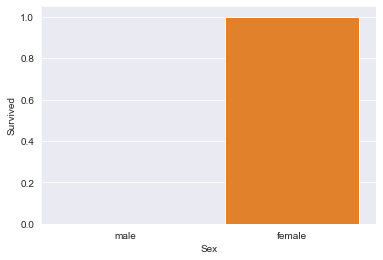

In [27]:
sns.barplot(x = df["Sex"], y = df["Survived"])
plt.show()

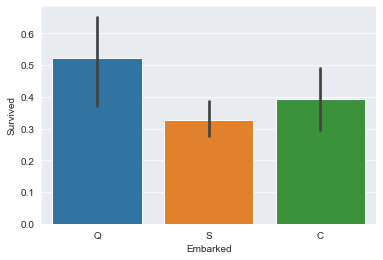

In [28]:
sns.barplot(x = df["Embarked"], y = df["Survived"])
plt.show()

Less survival rate by S embark, So there must be some relations!

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

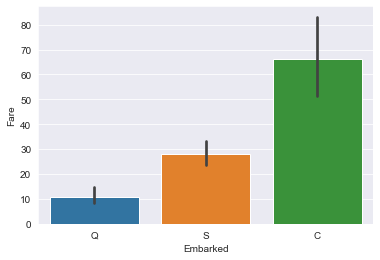

In [29]:
sns.barplot(x=df['Embarked'],y=df['Fare'])

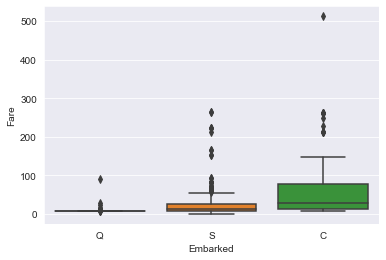

In [30]:
sns.boxplot(x = df["Embarked"], y = df["Fare"])
plt.show()

Strong outliers over 400 price, Let's just remove them for now and take a better look

In [31]:
index = df[df["Fare"] > 450 ].index
df.drop(index, axis = 0, inplace=True)

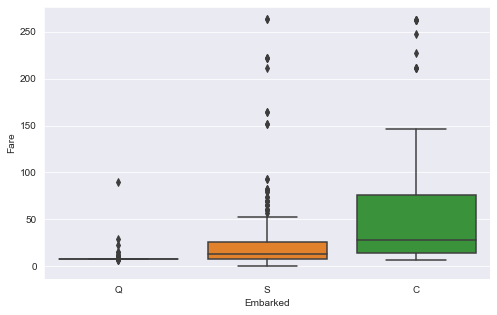

In [32]:
plt.figure(figsize=(8,5))
sns.boxplot(x = df["Embarked"], y = df["Fare"])
plt.show()

1. C embark is more expensive, maybe we can conclude that it's more premium than the others and maybe have better health guards and whatever, but clearly, if you paid more you had better chances of surviving.
2. But Q embark is cheaper than S and interestingly, it has a better survival rate, so maybe your placement in ship matters more because these embarks show each cluster of people who are entering the ship simultaneously.

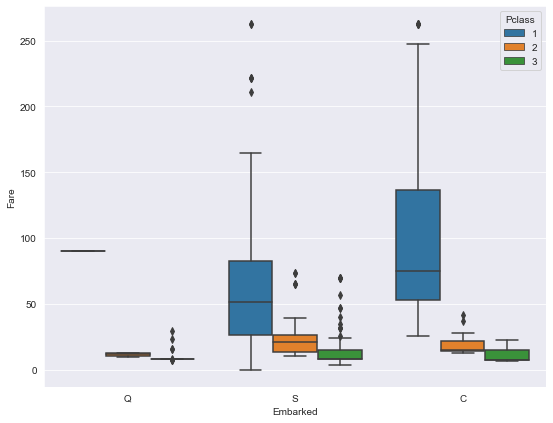

In [33]:
plt.figure(figsize=(9,7))
sns.boxplot(x = df["Embarked"], y = df["Fare"],hue = df["Pclass"])
plt.show()

So Q is mainly for the lower class and C can match our theory, Richer people got on board from C.

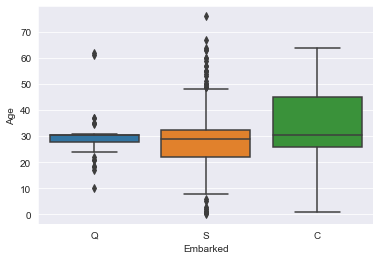

In [34]:
sns.boxplot(y = df["Age"], x = df["Embarked"])
plt.show()

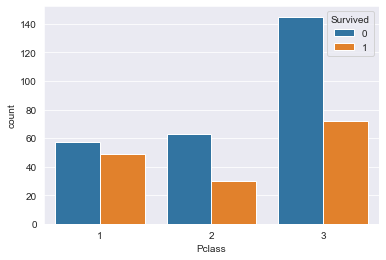

In [35]:
sns.countplot(x = df["Pclass"], hue = df["Survived"])
plt.show()

Wow, such discrimination! unfortunately, class 3 almost didn't make it alive :(
Money really could've bought you, your life!

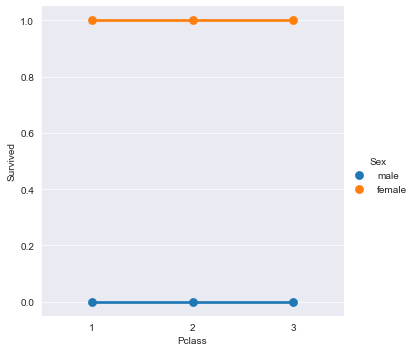

In [38]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df)

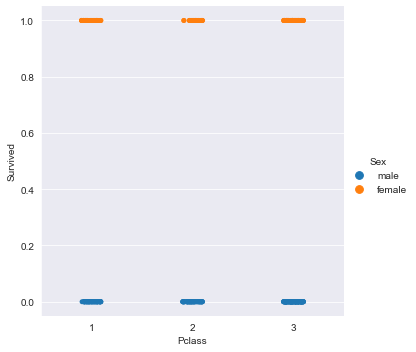

In [39]:
sns.catplot('Pclass','Survived',hue='Sex',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

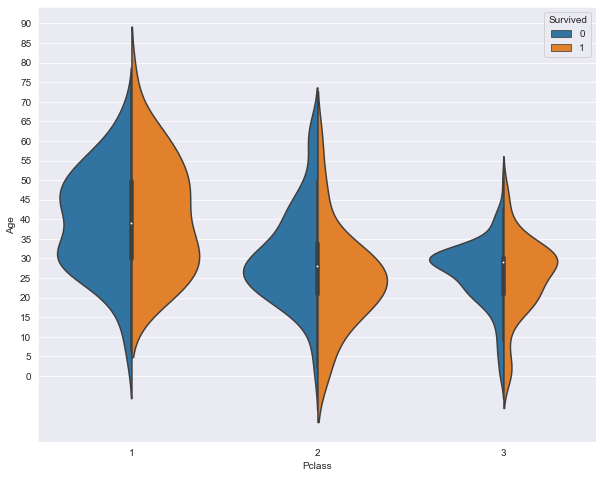

In [44]:
plt.figure(figsize=(10,8))
plt.yticks(range(0,110,5))
sns.violinplot(x=df['Pclass'],y=df['Age'],hue=df['Survived'],split=True)

Looks like rich kids stole the show! (Doin fancy stuff on board =))

Early on, we concluded that rich people got on board from C embark Let's see now if Pclass agrees with us or Nah?

<AxesSubplot:xlabel='Pclass', ylabel='count'>

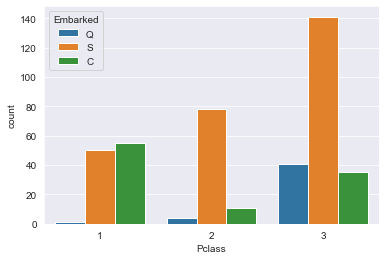

In [46]:
sns.countplot(df['Pclass'],hue=df['Embarked'])

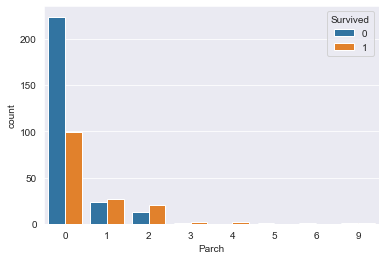

In [47]:
sns.countplot(df["Parch"], hue=df["Survived"])
plt.show()

Text(0, 0.5, 'chances of survival')

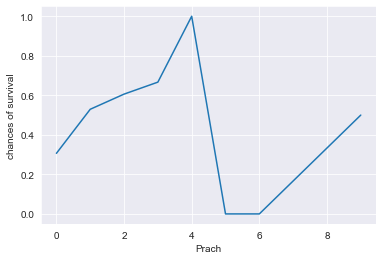

In [50]:
plt.plot(df.groupby('Parch')['Survived'].mean())
plt.xlabel('Prach')
plt.ylabel('chances of survival')
